# k-means Clustering

In this lab we will take a look at one of the simplest unsupervised learning algorithms called the k-means. The objective is to assign a set of data points into one of the $k$ clusters. As seen previously (see lecture notes), k-means clustering can be interpreted as a dimensionality reduction technique (albeit the same dimension as the original space) where the code vectors are constrained to be one-hot.

The general algorithm skeleton involves initializing $k$ (unknown) cluster centers and then minimizing the objective function until convergence. We see this algorithm in action below.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MiniBatchKMeans 

%matplotlib inline

Let's build some synthetic 2-D data and visualize it. `make_blobs` takes in cluster centers and generates i.i.d Gaussian data around those centers.

In [10]:
X, Y = make_blobs(n_samples=300, centers=4, cluster_std=2.0, random_state=45)
print(X.shape)

(300, 2)


Let us create a utility function that we can always use to plot our data points and cluster centers with assignments.

In [11]:

def plot_data(X, Z=None, C=None):
    '''
    X: data points, n_samples x dim
    C: cluster centers, n_samples x dim
    Z: cluster assignments, n_samples
    '''
    plt.figure(dpi=100)
    if Z is None:
        plt.scatter(X[:, 0], X[:, 1], c='m', marker='x', alpha=0.5)
        if C is not None:
            plt.scatter(C[:, 0], C[:, 1], c='b', marker='o', edgecolor='k')
    else:
        colors = ['r', 'g', 'b', 'c', 'y']

        for k in range(C.shape[0]):
            plt.scatter(X[Z == k, 0], X[Z == k, 1], c=colors[k], marker='x', alpha=0.5)
            plt.scatter(C[k, 0], C[k, 1], c=colors[k], marker='o', edgecolor='k')


    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def plot_update(X, Z, C, C_old):
    '''
    X: data points, n_samples x dim
    C: cluster centers, n_samples x dim
    Z: cluster assignments, n_samples
    '''
    plt.figure(dpi=100)
    if Z is None:
        plt.scatter(X[:, 0], X[:, 1], c='m', marker='x', alpha=0.5)
        if C is not None:
            plt.scatter(C[:, 0], C[:, 1], c='b', marker='o')
    else:
        colors = ['r', 'g', 'b', 'c','y']

        for k in range(C.shape[0]):
            plt.scatter(X[Z == k, 0], X[Z == k, 1], c=colors[k], marker='x', alpha=0.5)
            plt.scatter(C[k, 0], C[k, 1], c=colors[k], marker='o', edgecolor='k')
            plt.scatter(C_old[k, 0], C_old[k, 1], c='none', marker='o', edgecolor='k')
            
            plt.arrow(C_old[k, 0], C_old[k, 1], 0.8*(C[k, 0] - C_old[k, 0]), 0.8*(C[k, 1] - C_old[k, 1]),
                     width=0.01, head_width=0.4, color='k', alpha=0.75)
    

    plt.xticks([])
    plt.yticks([])
    plt.show()

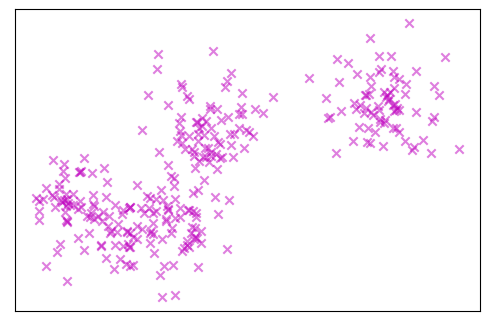

In [12]:
plot_data(X)

We now initialize our cluster centers $C$ (four of them) randomly and visualize below. We know for a fact that there are four clusters and hence we choose that value. For many real datasets, one might have to play around with this value.

In [13]:
K = 5
C = np.random.RandomState(36).randn(K, X.shape[-1])*2.5

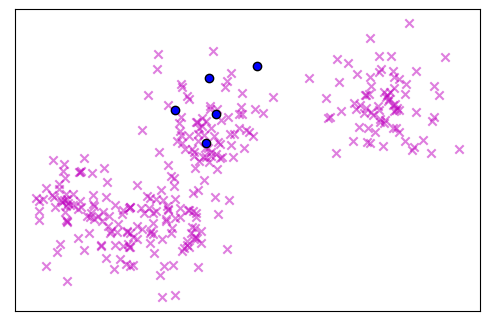

In [14]:
plot_data(X, C=C)

We now find the best possible assignment of clusters by minimizing the sum of squared distances to the current centers. The function below uses `numpy` broadcasting to compute $z_i$ which is the cluster assignment for the cluster center closest to the $i^{th}$ data point as

$$
\mathbf{z}_i = \underset{i}{\mathrm{argmin}} ||\mathbf{x}_i - \mathbf{w}_i||_2^2
$$

In [15]:
def expectation(X, C):
    '''
    X: n_samples x dim
    C: n_centers x dim
    '''
    return np.sum((X[:, np.newaxis, :] - C)**2, axis=-1).argmin(axis=-1)

def maximization(X, Z, K):
    '''
    X: n_samples x dim
    C: n_centers x dim
    K: # of centers
    '''
    C_new = np.zeros((K, X.shape[-1]))
    for k in range(K):
        C_new[k, :] = np.mean(X[Z == k, :], axis=0)
    return C_new

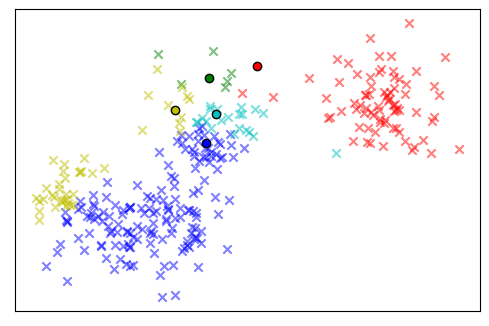

In [16]:
Z = expectation(X, C)
plot_data(X, Z=Z, C=C)

In [17]:
C_old = C.copy()

We then want to update the cluster centers.

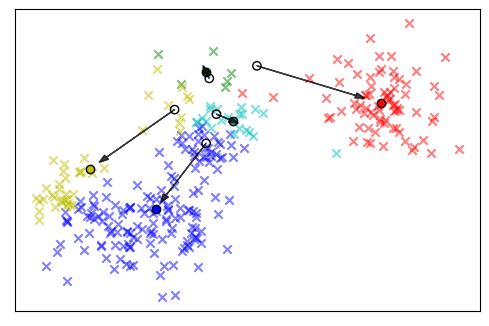

In [18]:
C = maximization(X, Z, K)
plot_update(X, Z, C, C_old)

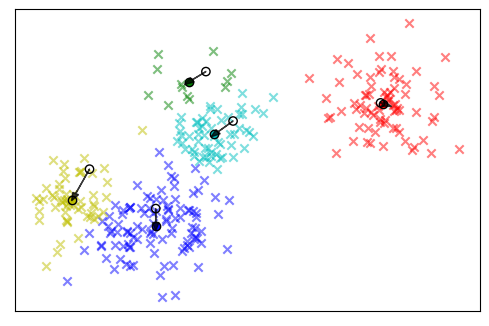

Next iteration.... 


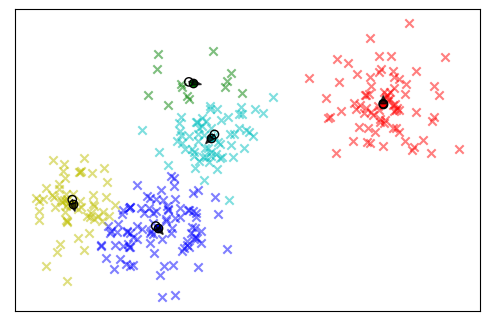

Next iteration.... 


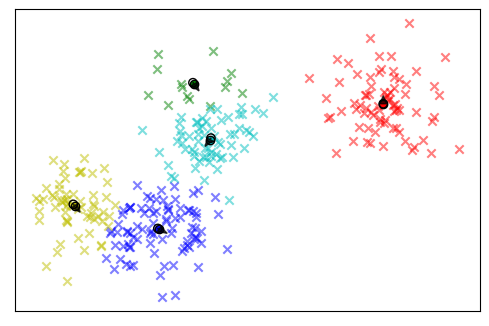

Next iteration.... 


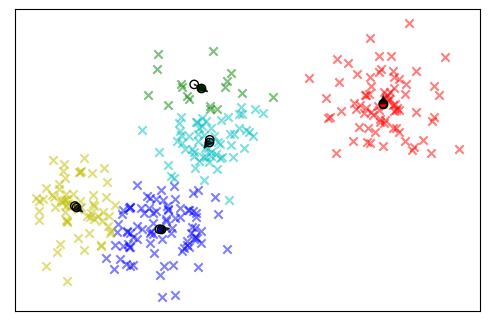

Next iteration.... 


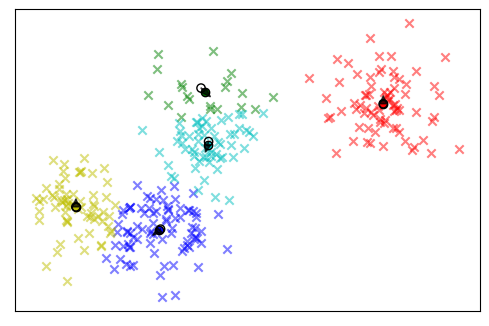

Next iteration.... 


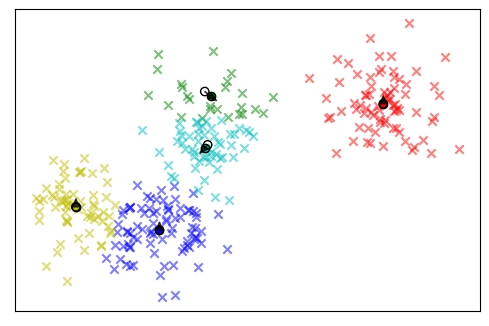

Next iteration.... 


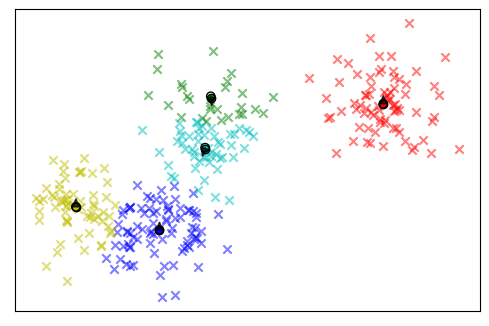

Next iteration.... 


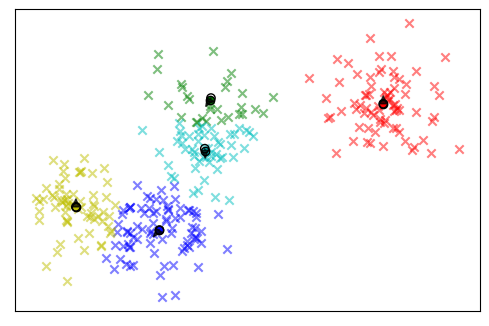

Next iteration.... 


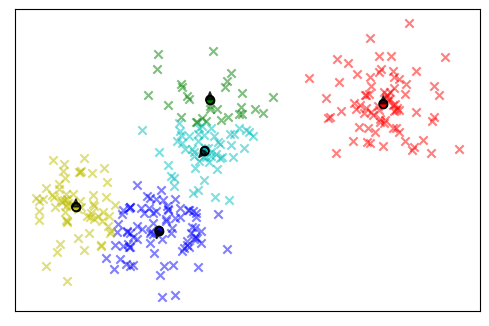

Next iteration.... 


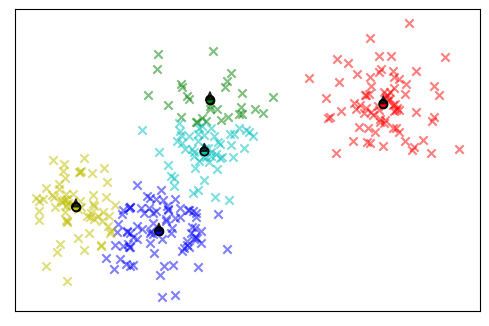

Done at iteration 9


In [19]:
max_iter = 100

Z_prev = np.copy(Z)
C_prev = np.copy(C)

eps = 1e-5

for i in range(max_iter):
    Z = expectation(X, C)

    C = maximization(X, Z, K)
    plot_update(X, Z, C, C_prev)
    if ((Z_prev - Z) ** 2).sum() < eps and ((C_prev - C) ** 2).sum() < eps:
        print('Done at iteration', i)
        break
    
    Z_prev = np.copy(Z)
    C_prev = np.copy(C)
    
    input("Next iteration....")

This alternate computation between assigning the cluster centers and updating the cluster centers is also known as the Expectation-Maximization (EM). EM is widely used across a spectrum of machine learning applications. The reasons for this become apparent once we consider what the two operations are actually doing and can be seen from a probabilistic perspective of Mixture Models. See [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) $\S9$ for details.

## Image Compression

An interesting example of using k-means clustering is to compress color images. A color image typically has three channels RGB consist of 256 values in each channel. Each pixel can be thought of as a three-dimensional object. This creates a total of $256^3 \approx 16$ million possible colors.  That's a lot of variety and surely there is redundancy. Let us use k-means algorithm to minimize the total number of colors in the image.

In this task, we introduce ourselves to the `KMeans` module from `scikit-learn`. Particularly, we use a more efficient implementation for larger datasets known as the `MiniBatchKMeans`.

Now load an image of your choice. For illustration, use the provided file *thomas.jpg*.

**NOTE**: To load the image, we need the PIL library. Install it in your environment using `pip install Pillow`.

In [262]:
img = plt.imread('./puppy.jpg')
img.shape

(3024, 2268, 3)

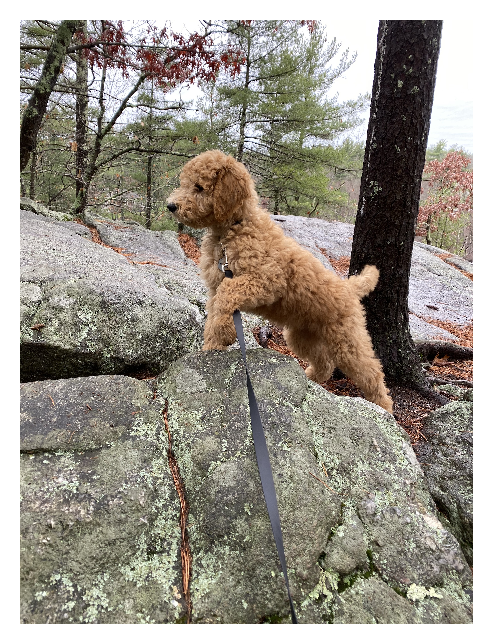

In [263]:
plt.figure(dpi=200)
plt.imshow(img, interpolation='none')
plt.axis('off')
plt.show()

We now reshape the image so as to consider each pixel as a datapoint. We also rescale the pixels in $[0, 1]$.

In [8]:
pixels = img.reshape(-1, 3) / 255.0
pixels.shape

NameError: name 'img' is not defined

## Now we have 

We now run the [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) with the total number of clusters as 16. This should take 1-2 minutes.

In [7]:
kmeans = MiniBatchKMeans(n_clusters=25, verbose=0)
kmeans.fit(pixels);

NameError: name 'pixels' is not defined

In [266]:
pred_centers = kmeans.predict(pixels)

In [267]:
pred_centers

array([ 9,  5, 10, ..., 22, 22, 22], dtype=int32)

Using the newly fit cluster centers, we remap the old pixels to new pixels and visualize.

In [268]:
new_pixels = kmeans.cluster_centers_[kmeans.predict(pixels)]

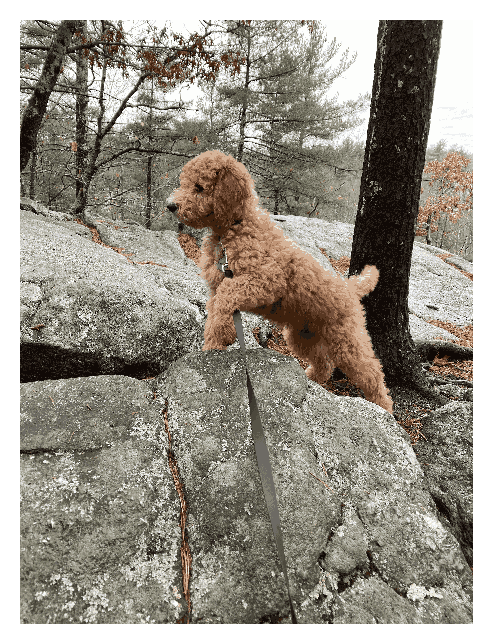

In [269]:
plt.figure(dpi=200)
plt.imshow(new_pixels.reshape(*img.shape), interpolation='none')
plt.axis('off')
plt.show()